In [54]:
from importlib import import_module
import os
import sys
from this import d
from canvas import irio
from canvas import Canvas
from canvas import blocks
from PIL import Image
import numpy as np
available_blocks=[]
for blockname,variant in blocks.name_description_val_mapping.items():
    if isinstance(variant,dict):
        for _,val in variant.items():
            available_blocks.append((blockname,val))
    else:
        available_blocks.append((blockname,0))

def has_values(b:str,v:list):
    for _v in v:
        if b.find(_v)!=-1:
            return True
    return False
        
available_blocks=[b for b in available_blocks if not has_values(b[0],[
    'lava','air','fire','water','powder','sand','bed','rail'
])]
print(available_blocks)
import json 
with open('palatte.json','w') as f:
    json.dump(available_blocks,f)
    

[('stone', 0), ('stone', 1), ('stone', 2), ('stone', 3), ('stone', 4), ('stone', 5), ('stone', 6), ('grass', 0), ('dirt', 0), ('dirt', 1), ('dirt', 2), ('cobblestone', 0), ('planks', 0), ('planks', 1), ('planks', 2), ('planks', 3), ('planks', 4), ('planks', 5), ('sapling', 0), ('sapling', 1), ('sapling', 2), ('sapling', 3), ('sapling', 4), ('sapling', 5), ('sapling', 8), ('sapling', 9), ('sapling', 10), ('sapling', 11), ('sapling', 12), ('sapling', 13), ('gravel', 0), ('gold_ore', 0), ('iron_ore', 0), ('coal_ore', 0), ('log', 0), ('log', 1), ('log', 2), ('log', 3), ('log', 4), ('log', 5), ('log', 6), ('log', 7), ('log', 8), ('log', 9), ('log', 10), ('log', 11), ('log', 12), ('log', 13), ('log', 14), ('log', 15), ('leaves', 0), ('leaves', 1), ('leaves', 2), ('leaves', 3), ('leaves', 4), ('leaves', 5), ('leaves', 6), ('leaves', 7), ('leaves', 8), ('leaves', 9), ('leaves', 10), ('leaves', 11), ('leaves', 12), ('leaves', 13), ('leaves', 14), ('leaves', 15), ('sponge', 0), ('sponge', 1), ('

In [ ]:
canvas = Canvas()
for x in range(64):
    for z in range(64):
        canvas.setblock('coal_block',0,x=x,y=0,z=z)
for i,(name,val) in enumerate(available_blocks):
    canvas.setblock(name,val,x=i%64,y=1,z=i//64)
        
final_ir = canvas.done()
irio.dump_ir_to_bdx(final_ir,
                    os.path.join("palatte_black.bdx"), # 保存文件路径
                    need_sign=True,
                    author='2401PT')


canvas = Canvas()
for x in range(64):
    for z in range(64):
        canvas.setblock('wool',0,x=x,y=0,z=z)
for i,(name,val) in enumerate(available_blocks):
    canvas.setblock(name,val,x=i%64,y=1,z=i//64)
        
final_ir = canvas.done()
irio.dump_ir_to_bdx(final_ir,
                    os.path.join("palatte_wool.bdx"), # 保存文件路径
                    need_sign=True,
                    author='2401PT')

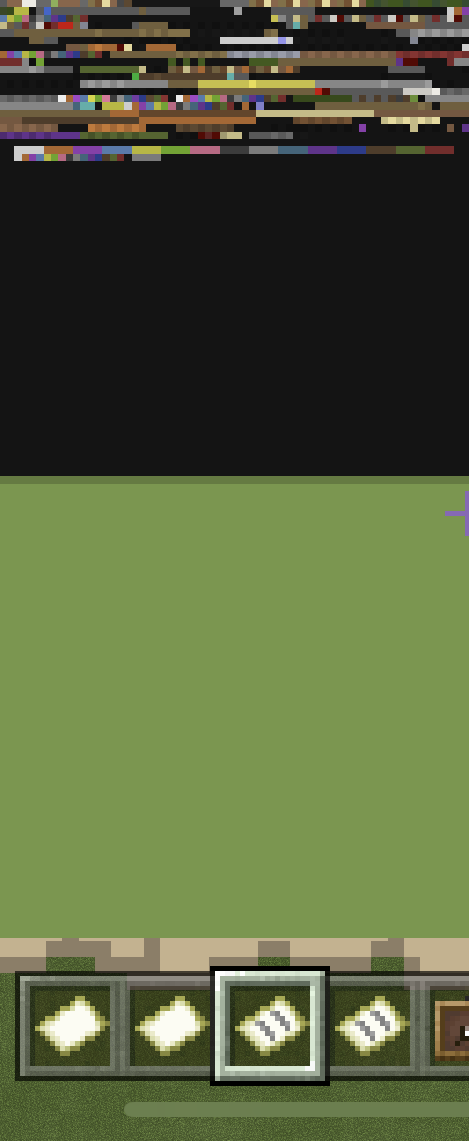

In [70]:
img_green=np.asarray(Image.open('green.png'))[101:,875:875+64*7+21]
img_wool=np.asarray(Image.open('wool.png'))[101:,875:875+64*7+21]
Image.fromarray(img_green)

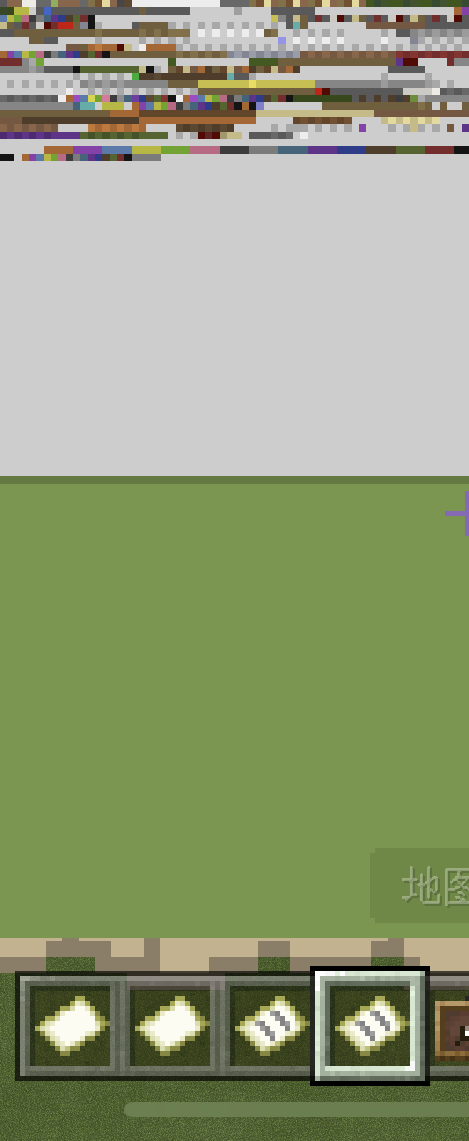

In [68]:
Image.fromarray(img_wool)

In [78]:
def get_pix_pos(x,z):
    box=7+(21/64)
    s=box/2
    return int(s+box*x),int(s+box*z)

color_values=[]
color_values_lookup={}
color_blocks={}
for i,(name,val) in enumerate(available_blocks):
    if has_values(name,['banner','door']):
        continue
    px,pz=get_pix_pos(x=i%64,z=i//64)
    c1=img_green[pz,px]
    c2=img_wool[pz,px]
    if np.sum(np.abs(c1-c2))!=0:
        continue
    c=tuple(c1[:3])
    if c not in color_values:
        ci=len(color_values)
        color_values.append(c)
        color_values_lookup[c]=ci
    else:
        ci=color_values_lookup[c]
    if color_blocks.get(ci) is None:
        color_blocks[ci]=[(name,val)]
    else:
        color_blocks[ci].append((name,val))
cmap=[]
for ci,blocks in color_blocks.items():
    cmap.append([blocks[0],[int(i) for i in color_values[ci]]])
print(cmap)
print(len(cmap))
with open('cmap.json','w') as f:
    json.dump(cmap,f,indent=2)

[[('stone', 0), [89, 89, 89]], [('stone', 1), [135, 102, 76]], [('stone', 3), [237, 235, 229]], [('stone', 5), [104, 104, 104]], [('grass', 0), [144, 174, 94]], [('planks', 0), [129, 112, 73]], [('planks', 1), [114, 81, 51]], [('planks', 2), [228, 217, 159]], [('planks', 4), [71, 71, 71]], [('planks', 5), [91, 72, 50]], [('leaves', 0), [64, 85, 32]], [('leaves', 1), [54, 75, 50]], [('leaves', 2), [68, 83, 47]], [('leaves', 14), [58, 71, 40]], [('leaves', 15), [55, 73, 28]], [('sponge', 0), [183, 183, 70]], [('lapis_block', 0), [69, 101, 198]], [('noteblock', 0), [111, 95, 63]], [('web', 0), [159, 159, 159]], [('wool', 0), [205, 205, 205]], [('wool', 1), [163, 104, 54]], [('wool', 2), [132, 65, 167]], [('wool', 3), [91, 122, 169]], [('wool', 5), [115, 162, 53]], [('wool', 6), [182, 106, 131]], [('wool', 7), [60, 60, 60]], [('wool', 8), [123, 123, 123]], [('wool', 9), [69, 100, 121]], [('wool', 10), [94, 52, 137]], [('wool', 11), [45, 59, 137]], [('wool', 12), [78, 61, 43]], [('wool', 13